# ЛР 1 — Завдання 2.4: Наївний байєсівський класифікатор + CV + метрики

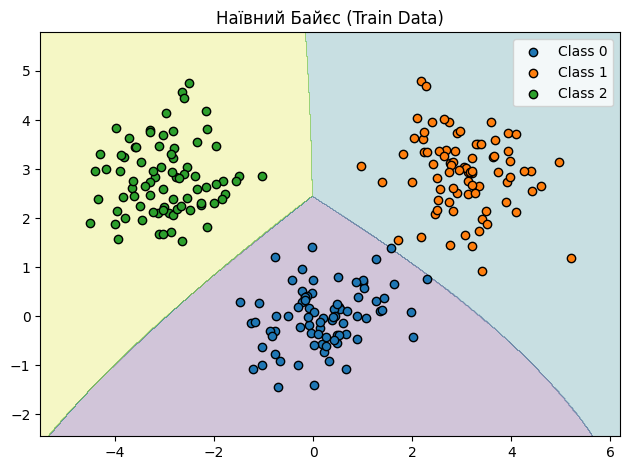

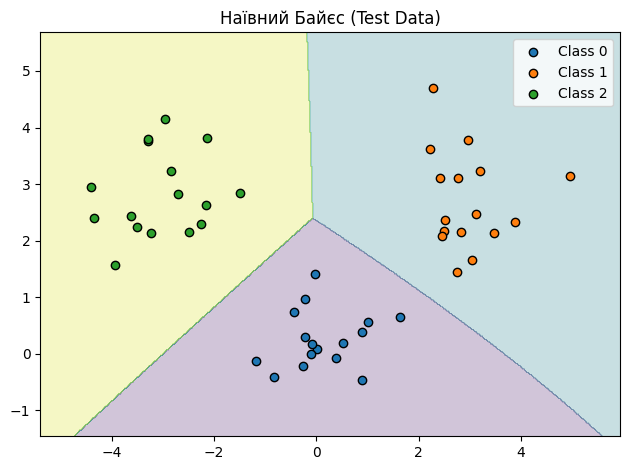

accuracy: 0.9958
precision_weighted: 0.9960
recall_weighted: 0.9958
f1_weighted: 0.9958


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

# Функція для візуалізації ---
def visualize_classifier(classifier, X, y, title=''):
    x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
    y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25)
    for cls in np.unique(y):
        pts = X[y == cls]
        plt.scatter(pts[:,0], pts[:,1], edgecolor='k', label=f'Class {cls}')
    plt.title(title)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Генерація даних
rng = np.random.default_rng(7)
n_per = 80  # кількість точок на клас
means = [(0, 0), (3, 3), (-3, 3)]
covs = [
    np.array([[0.8, 0.2], [0.2, 0.5]]),
    np.array([[0.7, -0.1], [-0.1, 0.6]]),
    np.array([[0.6, 0.0], [0.0, 0.6]])
]

X_list, y_list = [], []
for i, (m, c) in enumerate(zip(means, covs)):
    Xc = rng.multivariate_normal(m, c, size=n_per)
    X_list.append(Xc)
    y_list.append(np.full(n_per, i))
X = np.vstack(X_list)
y = np.concatenate(y_list)

# Навчання та оцінка
clf = GaussianNB().fit(X, y)
visualize_classifier(clf, X, y, "Наївний Байєс (Train Data)")

# Train/Test split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
clf2 = GaussianNB().fit(Xtr, ytr)
visualize_classifier(clf2, Xte, yte, "Наївний Байєс (Test Data)")

# Крос-валідація
for metric in ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']:
    scores = cross_val_score(GaussianNB(), X, y, scoring=metric, cv=3)
    print(f"{metric}: {scores.mean():.4f}")


Висновок:
Байєсівський класифікатор правильно визначив області належності класів і показав високу якість розпізнавання. Результати підтвердили його надійність для роботи з подібними наборами даних.